# Visualizing Housing Data Features

In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import contextily as ctx
import geopandas

Read in the beginning data frame

In [3]:
df = pd.read_csv('../data/raw/kc_house_data.csv')

Create subsets of the data, to visualize the individual features

## Mapping Features

### Comparing 'Waterfront' homes and 'View 4' homes
One of the first questions I had when looking at the data, was whether or not the missing values in 'waterfront' could be replaced so the column would be useable. 

I plotted the graph, but was surprised to see that only a small fraction of the homes that are on the waterfront, are designated as being so. With this insight, I decided that waterfront would not be a good indicator, and would most likely just cause noise.

In [4]:
waterfront_df = df[df['waterfront'] == 1]
great_view_df = df[df['view'] == 4]

In [5]:
# create geopandas frames
gdf = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df.long, df.lat), crs="EPSG:4326")

water_gdf = geopandas.GeoDataFrame(
    waterfront_df, geometry=geopandas.points_from_xy(waterfront_df.long, waterfront_df.lat), crs="EPSG:4326")

great_view_gdf = geopandas.GeoDataFrame(
    great_view_df, geometry=geopandas.points_from_xy(great_view_df.long, great_view_df.lat), crs="EPSG:4326")

In [20]:
gdf = gdf.to_crs(epsg=3857)
water_gdf = water_gdf.to_crs(epsg=3857);
great_view_gdf = great_view_gdf.to_crs(epsg=3857);

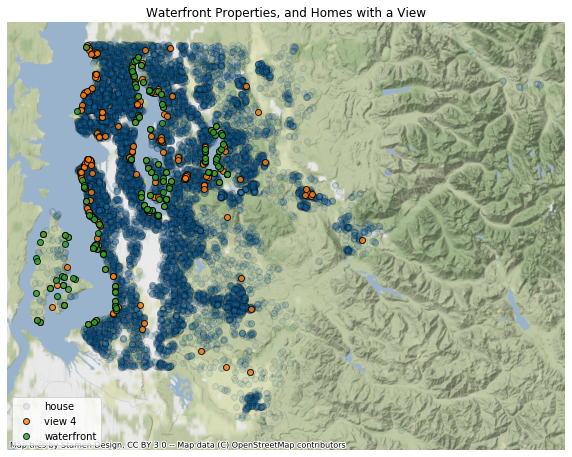

In [44]:
# map the features using their geo coordinates
all_homes = gdf.plot(figsize=(10, 10), alpha=0.1, edgecolor='k', label='house')
great_view_ax = great_view_gdf.plot(ax=all_homes, alpha=0.8, edgecolor='k', label='view 4')
water_gdf_ax = water_gdf.plot(ax=great_view_ax, alpha=0.8, edgecolor='k', label='waterfront')
plt.title('Waterfront Properties, and Homes with a View')
plt.legend()
ctx.add_basemap(water_gdf_ax, source=ctx.providers.Stamen.TerrainBackground)
water_gdf_ax.set_axis_off()

### Schools
Since one of my questions is about the value of location in regards to schools, I decided it would be a good idea to graph all of the locations of the good schools, and see if the higher costing homes were located in the same proximity.

You can see from the plot that there are indeed schools located inside the dense clusters of upper valued homes.

In [10]:
# read in list of schools and their address
schools_df = pd.read_csv('../data/raw/school_ratings.csv', index_col=0)

In [11]:
# make sure to only get schools from WA
schools_df = schools_df[schools_df['state'] == ' WA']

In [12]:
# drop outlier, somewhere in eastern WA
schools_df = schools_df.drop([48, 51], axis=0)

In [13]:
# create geopandas dataframe
schools_gdf = geopandas.GeoDataFrame(
    schools_df, geometry=geopandas.points_from_xy(schools_df.long, schools_df.lat), crs="EPSG:4326")

In [21]:
# subset of expensive homes
expensive_homes_df = df[df['price'].between(df['price'].quantile(.6), df['price'].quantile(.8))]

In [22]:
# create geopandas dataframe
expensive_homes_gdf = geopandas.GeoDataFrame(
    expensive_homes_df, geometry=geopandas.points_from_xy(expensive_homes_df.long, expensive_homes_df.lat), crs="EPSG:4326")

In [23]:
schools_gdf = schools_gdf.to_crs(epsg=3857);
expensive_homes_gdf = expensive_homes_gdf.to_crs(epsg=3857);

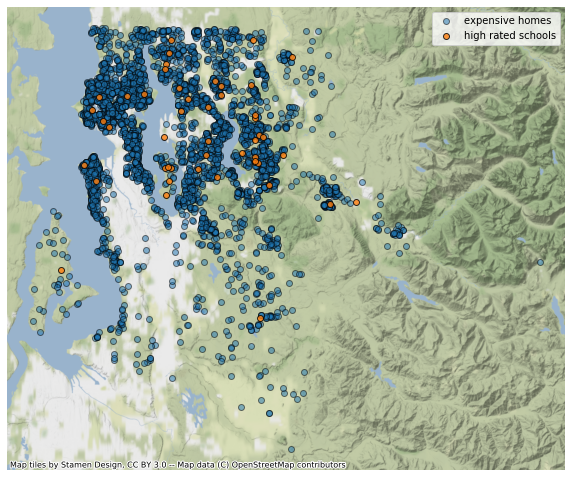

In [24]:
expensive_homes = expensive_homes_gdf.plot(figsize=(10, 10), alpha=0.5, edgecolor='k', label='expensive homes')
schools = schools_gdf.plot(ax=expensive_homes, alpha=0.8, edgecolor='k', label='high rated schools')
plt.legend()
ctx.add_basemap(schools, source=ctx.providers.Stamen.TerrainBackground)
schools.set_axis_off()

### Walk and Bike Score
Many people assume it costs more to buy a house that has a higher walk or bike accessibility. To answer this question I used the same API service that Zillow uses, and obtained the walking and biking score for each home.

In [27]:
# read in data
score_df = pd.read_csv('../data/processed/housing_data.csv', index_col=0)

# create geopandas df
score_gdf = geopandas.GeoDataFrame(
    score_df, geometry=geopandas.points_from_xy(score_df.long, score_df.lat), crs="EPSG:4326")

In [30]:
# convert lat and long to format that map understands
score_gdf = score_gdf.to_crs(epsg=3857)

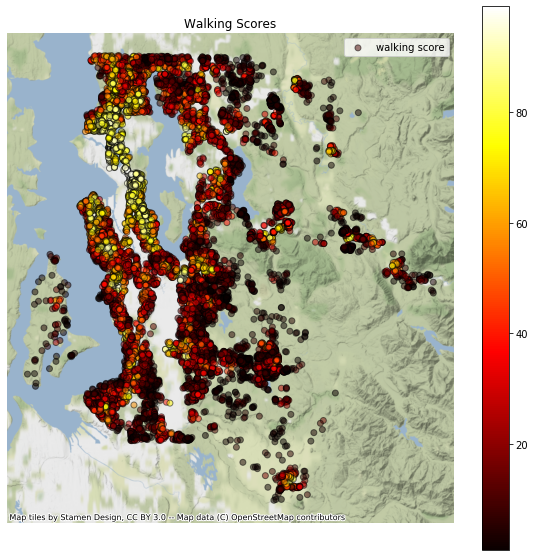

In [41]:
walking = score_gdf.plot(column='walk_score', figsize=(10, 10), alpha=0.5, edgecolor='k', legend=True, label='walking score', cmap='hot')
plt.legend()
plt.title('Walking Scores')
ctx.add_basemap(walking, source=ctx.providers.Stamen.TerrainBackground)
walking.set_axis_off()

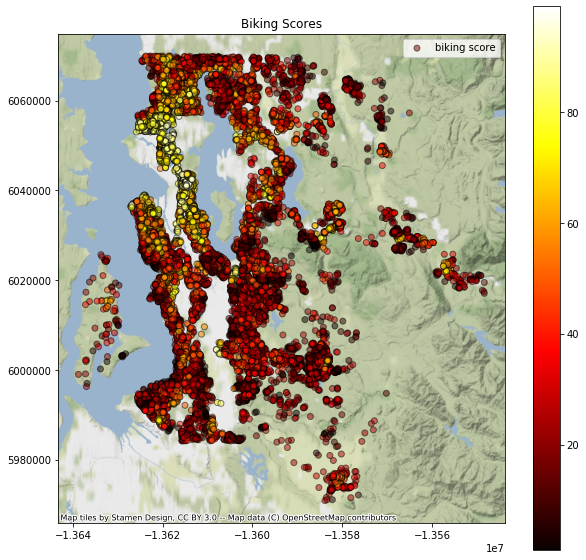

In [42]:
biking = score_gdf.plot(column='bike_score', figsize=(10, 10), alpha=0.5, edgecolor='k', legend=True, label='biking score', cmap='hot')
plt.legend()
plt.title('Biking Scores')
ctx.add_basemap(biking, source=ctx.providers.Stamen.TerrainBackground)
walking.set_axis_off()

### Any relation to Price
The graphs look great. Without any information it's easy to assume there is a positive relationship between price and bike/walk scores.

Let's go ahead and graph the houses with a 90+ walking/cycling score and see what the corresponding home prices are like.

In [56]:
walking_paradise_gdf = score_gdf[score_gdf['bike_score'].between(80, 100)]

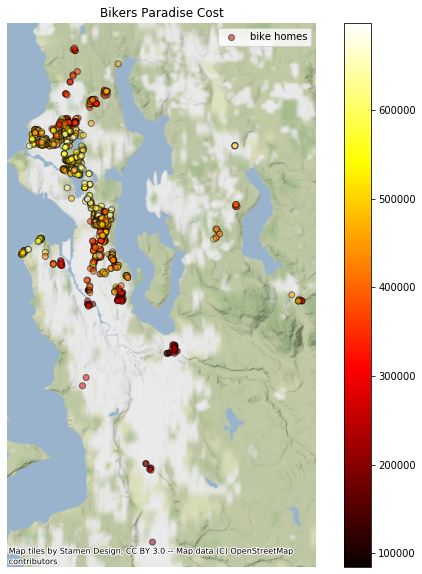

In [57]:
walking_paradise = walking_paradise_gdf.plot(column='price', figsize=(10, 10), alpha=0.5, edgecolor='k', legend=True, label='bike homes', cmap='hot')
plt.legend()
plt.title('Bikers Paradise Cost')
ctx.add_basemap(walking_paradise, source=ctx.providers.Stamen.TerrainBackground)
walking_paradise.set_axis_off()

Okay, well there does appear to be a relationship between price and high bike scores. As we can see from the map, there are homes all over the price spectrum that have scores high on the walk score, though there is a largec concentration of expensive homes with good bike scores in Seattle.